In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import re
from eunjeon import Mecab

In [5]:
상폐기업 = pd.read_csv('./data/상폐기업뉴스.csv')
data=상폐기업

In [6]:
data[:5]

,기업,기사발행일,기사제목,뉴스기사본문
0,네이쳐글로벌,2010.10.01. 오전 9:23,"[특징주] 네이쳐글로벌 상한가…""전 대표 횡령 확인 안돼""",비메모리 반도체 업체인 네이쳐글로벌이 전 대표 횡령 혐의에 대해 확인된 바 없다고 ...
1,네이쳐글로벌,2010.10.02. 오전 2:02,[코스닥 기업공시] (1일) 네이쳐글로벌 등,"▲네이쳐글로벌=전 대표이사의 횡령,배임 및 가장납입이 확인되지 않음.\n\n▲세동=..."
2,네이쳐글로벌,2010.09.28. 오후 4:29,"네이쳐글로벌, 네비스탁측이 74만여주 장내매도",[이데일리 안재만 기자] 네비스탁은 특별관계자로 포함된 개인투자자들이 네이쳐글로벌(...
3,네이쳐글로벌,2010.09.16. 오전 9:23,"[특징주] 네이쳐글로벌, 투자경고 지정 이후 약세",네이쳐글로벌이 투자경고 지정 소식에 이어 전환사채(CB) 물량 상장에 따른 수급 불...
4,네이쳐글로벌,2010.09.14. 오후 4:21,"네비스탁외 51인, 네이쳐글로벌 지분 1.26% 줄어",[이데일리 유용무 기자] 네비스탁외 51인은 14일 신규 소액주주 의결권 규합 및 ...


In [7]:
제거할기사제목 = ['증시 일정', '증시일정', '장마감후', '장 마감 후', '장마감공시', '증시 캘린더', '재송', '투자정보', \
    '코스닥 기업공시', '장중 주요', '코스닥 3분기 결산', '주요 뉴스 및 공시', '기업공시',' 기업 공시', '장 종료 후', \
        '특징주A/S', '주요 정보', '오전 공시', '투자정보', '기업 공시', '오늘의 메모', '재테크 캘린더', '추천주 정리', '희망복원 주식클리닉', \
        '\d{1,2}월 \d{1,2}일', '오늘의 주요 공시', '코스닥 공시', '코스닥 메모', '대박 공모주', '<표>', '오늘의 리포트', \
        '공략주', '주식상담소', '주식왕 따라잡기', '주식컨설팅', '\d{4} 증시', '춤추는 테마주', '개장시황', \
        '폭등신호 터진', '대폭등', '매드머니', '주담과 Q&A', '굿바이 \d{4}', '지금 당장 사라', '폭등주', \
        '\d{4}%', '김정일 사망', '종목대탐험', '종목신호등', 'VIP CLUB', '수급유망주', '기상도', '중소형주', \
        '국민주식고충처리반', '유망주', '머니Q', '시초가잡아라', '기관 Q&A', '부동산에 투자하려면', '베스트애널리스트', \
        '코스닥협회장 취임', '코스닥협회', '부동산에 투자하는 방법', '국가품질 경영대회', '증시일정', '머니Q', '추천종목', '티타임 공략주', \
        '수급유망주', '종목배틀', '\d{4} 증시 결산', '기업설명회', '종목신호등', 'VIP CLUB 추천주', '내일장 공략주 10선', '주간컨센서스동향', \
        '주담과 Q&A', '조회공시', '주가급등 사유', '관련株들', '게임株', '이시각 Up&Down', '장내 매도', '[인사]', '증시기상도', \
        '[재송]', '마감시황', '주식부자 속출', '교육주', '티타임 공략주', '\d{1,2}일 증권사 추천종목', '기업IR소식', '[승부주]']
# 제거제목리스트=[]
제거제목리스트 = '|'.join(제거할기사제목)
data_unique = data.drop_duplicates(['뉴스기사본문'])
data_result = data_unique[~data_unique['기사제목'].str.contains(제거제목리스트, na=False, case=False)]
#data_result.to_csv('dd.csv')
pattern1 = r'\([^)]*\)'
#pattern2 = r'\[[^)]*\]'
pattern2 = r"\[([^]]+)\]"



# data_unique['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_unique['뉴스기사본문']]
# data_unique['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_unique['뉴스기사본문전처리']]
# data_unique['뉴스기사본문전처리'] = [re.sub('[^/^$|\s+/가-힣\.]', '', s) for s in data_unique['뉴스기사본문전처리']]
# data_unique['뉴스기사본문전처리'] = [re.sub('[[ \s]{2,}\.{2,}]', '', s) for s in data_unique['뉴스기사본문전처리']]
# data_unique['뉴스기사본문전처리'] = [re.sub('\n', '', s) for s in data_unique['뉴스기사본문전처리']]
# data_unique
# data_unique.to_csv('dd.csv', index=None)





data_result['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_result['뉴스기사본문']]
data_result['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_result['뉴스기사본문전처리']]
data_result['뉴스기사본문전처리'] = [re.sub('[^/^$|\s+/가-힣\.]', '', s) for s in data_result['뉴스기사본문전처리']]
data_result['뉴스기사본문전처리'] = [re.sub('[[ \s]{2,}\.{2,}]', '', s) for s in data_result['뉴스기사본문전처리']]
data_result['뉴스기사본문전처리'] = [re.sub('\n', '', s) for s in data_result['뉴스기사본문전처리']]
data_result
data_result.to_csv('dd.csv', index=None)

C:\Users\jangd\AppData\Local\Temp\ipykernel_25780\696962634.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_result['뉴스기사본문']]
C:\Users\jangd\AppData\Local\Temp\ipykernel_25780\696962634.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_result['뉴스기사본문전처리']]
C:\Users\jangd\AppData\Local\Temp\ipykernel_25780\696962634.py:38: SettingWithCopyWarning: 
A value is trying to be

In [8]:
train_data = pd.read_csv('./dd.csv')


In [9]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [10]:
# 형태소 분석기 mecab를 사용한 토큰화 작업 (다소 시간 소요)

mecab = Mecab()
tokenized_data = []
output=[]
for sentence in train_data['뉴스기사본문전처리']:
    temp_X = mecab.nouns(sentence)  # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거

    tokenized_data.append(temp_X)

한글자 제거

In [11]:
remove_one_word=[]
for j in range(len(tokenized_data)):
    a=[x for x in tokenized_data[j] if len(x)>1]
    remove_one_word.append(a)

In [12]:
remove_one_word
len(remove_one_word)
list_text_1=sum(remove_one_word, [])

In [13]:
list_text_1

['글로벌',
 '반기',
 '검토',
 '의견',
 '의견',
 '거절',
 '관리',
 '종목',
 '지정',
 '사유',
 '발생',
 '공시',
 '한국',
 '거래소',
 '글로벌',
 '주권',
 '매매',
 '거래',
 '정지',
 '공시',
 '한경',
 '닷컴',
 '최성남',
 '기자',
 '오늘',
 '추천',
 '종목',
 '기습',
 '극비',
 '세력',
 '밸류',
 '무료',
 '체험',
 '당첨',
 '이벤트',
 '성공',
 '습관',
 '한경',
 '닷컴',
 '무단',
 '전재',
 '배포',
 '금지',
 '한국',
 '온라인',
 '신문',
 '협회',
 '디지털',
 '뉴스',
 '이용',
 '규칙',
 '저작',
 '행사',
 '글로벌',
 '신용',
 '등급',
 '기존',
 '하향',
 '조정',
 '신정',
 '평가',
 '정평',
 '금융',
 '기관',
 '신인',
 '저하',
 '주력',
 '사업',
 '약화',
 '수익',
 '기반',
 '대폭',
 '축소',
 '신규',
 '사업',
 '소송',
 '관련',
 '우발',
 '채무',
 '현실',
 '가능',
 '고려',
 '이번',
 '등급',
 '하향',
 '배경',
 '설명',
 '정평',
 '향후',
 '신용',
 '등급',
 '의미',
 '등급',
 '전망',
 '부정',
 '평가',
 '저조',
 '현금',
 '흐름',
 '지속',
 '예상',
 '가운데',
 '신규',
 '사업',
 '전개',
 '투자',
 '부담',
 '가능',
 '고려',
 '데일리',
 '문자',
 '시세',
 '추천',
 '진단',
 '상담',
 '정보',
 '데일리',
 '모바일',
 '실시간',
 '해외',
 '지수',
 '글로벌',
 '경제',
 '뉴스',
 '금융',
 '정보',
 '터미널',
 '데일리',
 '종합',
 '경제',
 '정보',
 '미디어',
 '데일리',
 '무단',
 '전재',
 '배포',
 '금지',
 '안방',
 '경제',
 '뉴스',
 '

In [20]:
c = Counter(list_text_1) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
print(c)

Counter({'공시': 3136, '경제': 2510, '기업': 2458, '상장': 2452, '종목': 2268, '금지': 2240, '배포': 2176, '뉴스': 2137, '무단': 2070, '전재': 2063, '규모': 2059, '투자': 1937, '시장': 1929, '결정': 1868, '사업': 1730, '한국': 1692, '기자': 1681, '정보': 1673, '회사': 1624, '코스닥': 1584, '대표': 1576, '증자': 1537, '주식': 1500, '억만': 1497, '주가': 1496, '데일리': 1433, '영업': 1414, '자금': 1328, '폐지': 1309, '유상': 1259, '기록': 1227, '계약': 1218, '지난해': 1209, '증권': 1195, '거래': 1144, '주주': 1144, '관리': 1102, '업체': 1073, '에스': 1066, '저작': 1050, '발행': 1035, '금융': 1020, '관련': 1015, '상승': 944, '대비': 930, '매매': 867, '지분': 867, '지정': 857, '최근': 855, '자본': 838, '개발': 832, '감사': 813, '최대': 809, '거래소': 808, '관계자': 777, '손실': 763, '하락': 755, '법인': 752, '투자자': 746, '이사': 744, '수익': 740, '경우': 736, '이익': 736, '전자': 731, '세계': 723, '신청': 713, '매출': 710, '실적': 707, '변경': 697, '이상': 693, '머니': 692, '투데이': 689, '매출액': 682, '분기': 677, '테크': 670, '가능': 664, '공급': 664, '성공': 661, '아시아': 661, '매수': 660, '국내': 658, '모바일': 646, '올해': 645, '진행': 643, '오늘': 642, '때문

In [15]:
c

Counter({'글로벌': 575,
         '반기': 277,
         '검토': 288,
         '의견': 621,
         '거절': 372,
         '관리': 1102,
         '종목': 2268,
         '지정': 857,
         '사유': 489,
         '발생': 600,
         '공시': 3136,
         '한국': 1692,
         '거래소': 808,
         '주권': 160,
         '매매': 867,
         '거래': 1144,
         '정지': 448,
         '한경': 253,
         '닷컴': 289,
         '최성남': 10,
         '기자': 1681,
         '오늘': 642,
         '추천': 584,
         '기습': 13,
         '극비': 17,
         '세력': 30,
         '밸류': 28,
         '무료': 322,
         '체험': 22,
         '당첨': 18,
         '이벤트': 131,
         '성공': 661,
         '습관': 203,
         '무단': 2070,
         '전재': 2063,
         '배포': 2176,
         '금지': 2240,
         '온라인': 263,
         '신문': 428,
         '협회': 212,
         '디지털': 285,
         '뉴스': 2137,
         '이용': 406,
         '규칙': 166,
         '저작': 1050,
         '행사': 529,
         '신용': 207,
         '등급': 113,
         '기존': 303,
         

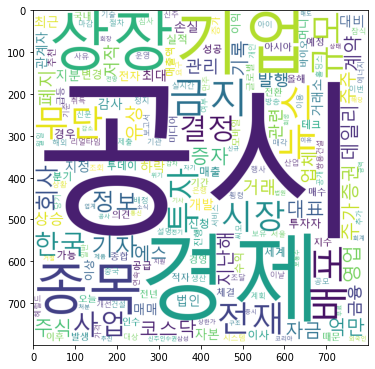

In [19]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250,background_color='white')
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(6,8))

plt.imshow(gen)
wc.to_file('상폐_워드클라우드.png')